# Test Dataset

In [ ]:
# prompt: random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

train_data_m = pd.read_csv("https://raw.githubusercontent.com/mohammed1916/ml/main/Datasets/JobOffer.csv")
test_data_m = pd.read_csv("https://raw.githubusercontent.com/mohammed1916/ml/main/Datasets/JobOfferTest.csv")
print(train_data_m)
column_values = {
    'CGPA': ['<8', '>=8', '>=9'],
    'Interactive': ['Yes', 'No'],
    'Practical Knowledge': ['Average', 'Good', 'Very Good'],
    'Communication Skills': ['Poor', 'Moderate', 'Good'],
    'Job Offer': ['Yes', 'No']
}

  CGPA Interactive Practical Knowledge Communication Skills Job Offer
0  >=9         Yes           Very Good                 Good       Yes
1  >=8          No                Good             Moderate       Yes
2  >=9          No             Average                 Poor        No
3   <8          No             Average                 Good        No
4  >=8         Yes                Good             Moderate       Yes
5  >=9         Yes                Good             Moderate       Yes
6   <8         Yes                Good                 Poor        No
7  >=9          No           Very Good                 Good       Yes
8  >=8         Yes                Good                 Good       Yes
9  >=8         Yes             Average                 Good       Yes


In [ ]:
# prompt: Apply encoding to columns

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for column in column_values:
    train_data_m[column] = label_encoder.fit_transform(train_data_m[column])
    test_data_m[column] = label_encoder.transform(test_data_m[column])


In [ ]:
train_data_m

,CGPA,Interactive,Practical Knowledge,Communication Skills,Job Offer
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,0,0
4,1,1,1,1,1
5,2,1,1,1,1
6,0,1,1,2,0
7,2,0,2,0,1
8,1,1,1,0,1
9,1,1,0,0,1


In [ ]:
#   create code for random forest'

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier using the training data
clf.fit(train_data_m.drop('Job Offer', axis=1), train_data_m['Job Offer'])

# Predict the labels for the test data
y_pred = clf.predict(test_data_m.drop('Job Offer', axis=1))

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == test_data_m['Job Offer'])
print('Accuracy:', accuracy)


Accuracy: 1.0


In [ ]:
# prompt: predict using new values

new_data = pd.DataFrame({
    'CGPA': ['>=8'],
    'Interactive': ['Yes'],
    'Practical Knowledge': ['Good'],
    'Communication Skills': ['Moderate']
})

new_data = label_encoder.transform(new_data)

prediction = clf.predict(new_data)

if prediction == 1:
    print('The candidate will receive a job offer.')
else:
    print('The candidate will not receive a job offer.')


ValueError: y contains previously unseen labels: '>=8'

# Test Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, Random

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv", header=None)

In [ ]:
df

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
# # Split the dataset into features and labels
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# # Create an AdaBoost classifier
# clf = AdaBoostClassifier()
# clfR = RandomForestClassifier()

# # Train the classifier using the training data
# clf.fit(X, y)
# clfR.fit(X, y)

# # Predict the labels for the test data
# y_pred = clf.predict(X)
# y_predR = clfR.predict(X)

# # Calculate the accuracy of the model
# accuracy = np.mean(y_pred == y)
# accuracyR = np.mean(y_pred == y)
# print('Accuracy:', accuracy)

Accuracy: 0.7941176470588235


# IRIS DATASET

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_test)
adaboost_preds = adaboost_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)

print("Random Forest Accuracy:", rf_accuracy)
print("AdaBoost Accuracy:", adaboost_accuracy)


Random Forest Accuracy: 0.7666666666666667
AdaBoost Accuracy: 0.7


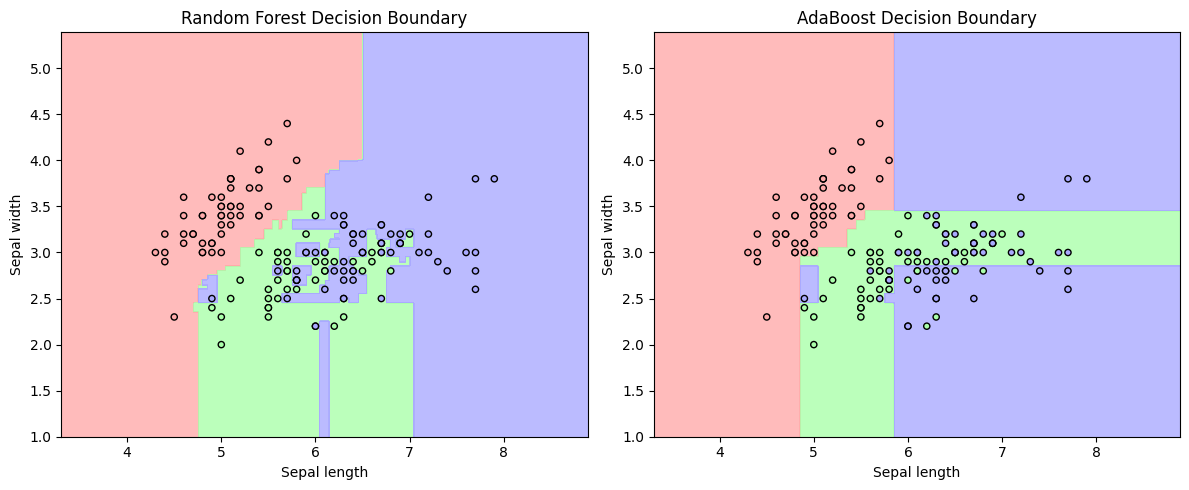

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Define colormap for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the decision boundaries and training examples
plt.figure(figsize=(12, 5))

# Plot decision boundary for Random Forest
plt.subplot(1, 2, 1)
Z_rf = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, cmap=cmap_light, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, edgecolor='k', s=20)
plt.title('Random Forest Decision Boundary')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot decision boundary for AdaBoost
plt.subplot(1, 2, 2)
Z_adaboost = adaboost_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_adaboost = Z_adaboost.reshape(xx.shape)
plt.contourf(xx, yy, Z_adaboost, cmap=cmap_light, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, edgecolor='k', s=20)
plt.title('AdaBoost Decision Boundary')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()
